In [1]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['scikit-learn'])
await piplite.install(['skillsnetwork', 'seaborn'])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork
import warnings
warnings.filterwarnings('ignore')

In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')


Saved as 'automobileEDA.csv'


In [5]:
df = pd.read_csv("automobileEDA.csv", header=0)

In [6]:
# Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression()
lm

LinearRegression()

In [9]:
X = df[['highway-mpg']]
Y = df['price']

In [10]:
lm.fit(X,Y)

LinearRegression()

In [11]:
Yhat=lm.predict(X)
Yhat[0:5] 

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [13]:
lm.intercept_

38423.30585815743

In [14]:
lm.coef_

array([-821.73337832])

In [15]:
lm1= LinearRegression()
lm1

LinearRegression()

In [16]:
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [18]:
lm1.intercept_

array([-7963.33890628])

In [24]:
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

In [25]:
Price,df['engine-size']

(0      13728.46
 1      13728.46
 2      17399.38
 3      10224.40
 4      14729.62
          ...   
 196    15563.92
 197    15563.92
 198    20903.44
 199    16231.36
 200    15563.92
 Name: engine-size, Length: 201, dtype: float64,
 0      130
 1      130
 2      152
 3      109
 4      136
       ... 
 196    141
 197    141
 198    173
 199    145
 200    141
 Name: engine-size, Length: 201, dtype: int64)

In [26]:
# Multiple Regression  Model

In [27]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [28]:
lm.fit(Z, df['price'])

LinearRegression()

In [29]:
lm.intercept_

-15806.62462632922

In [30]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [31]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [32]:
lm2.coef_


array([   1.49789586, -820.45434016])

In [33]:
import seaborn as sns
%matplotlib inline 

(0.0, 48167.180338125334)

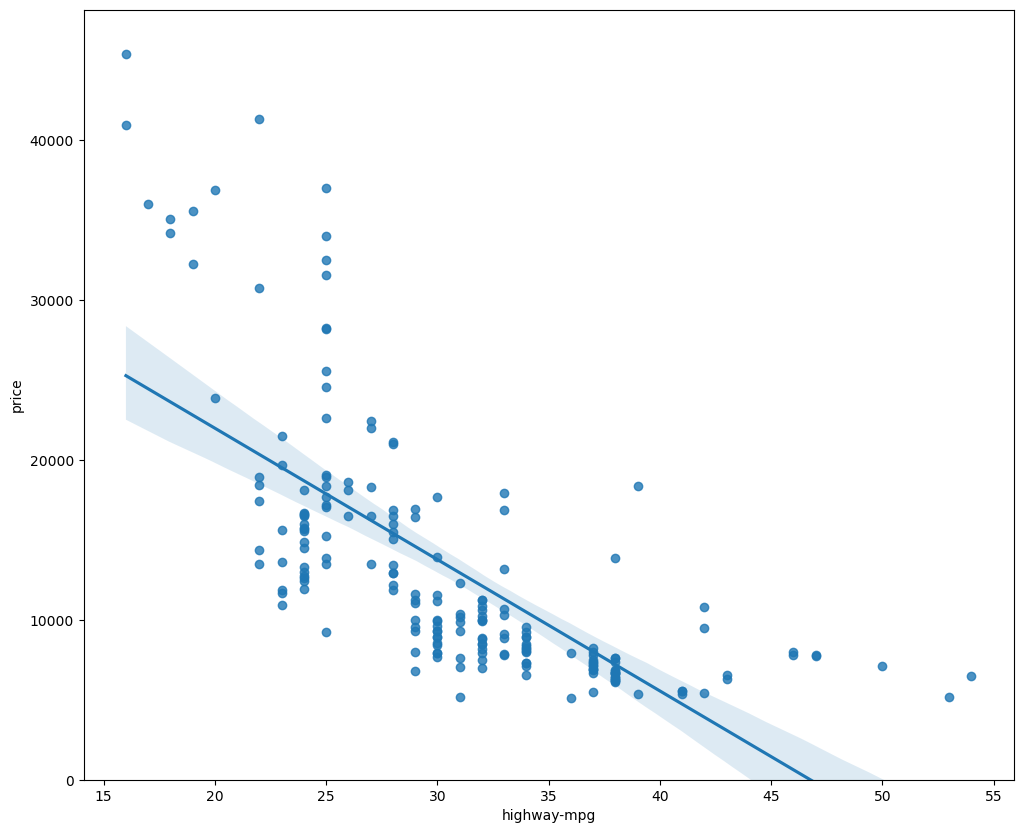

In [34]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 47414.1)

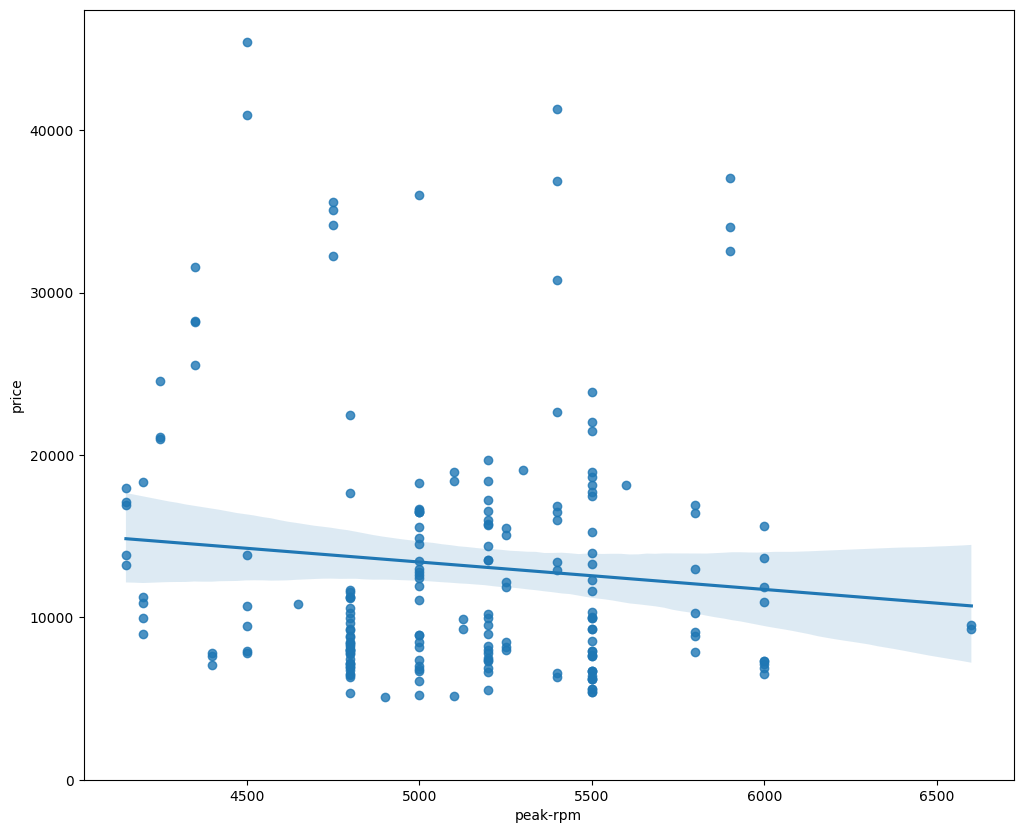

In [35]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [36]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


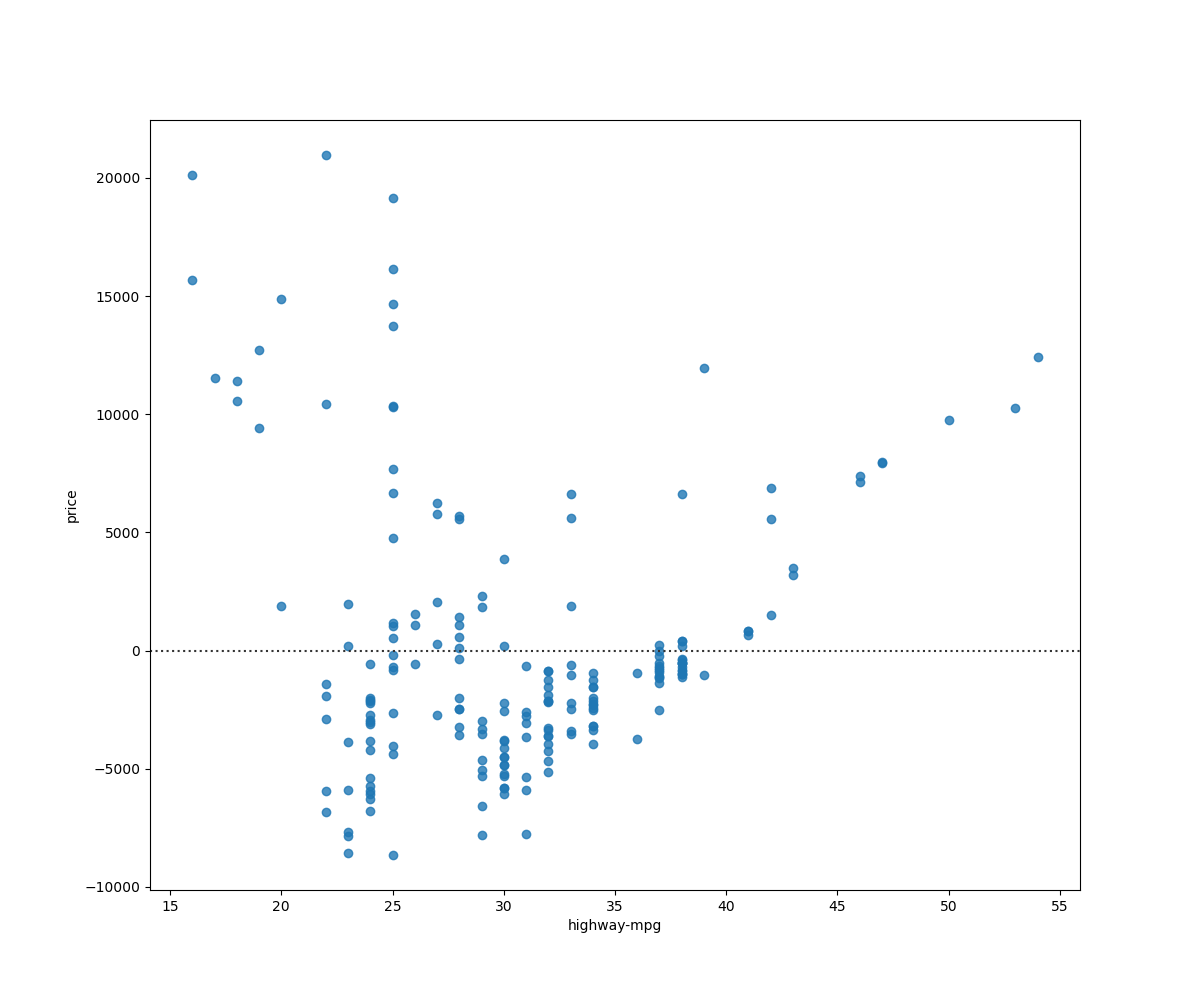

<Figure size 1200x1000 with 0 Axes>

In [37]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

In [38]:
Y_hat = lm.predict(Z)

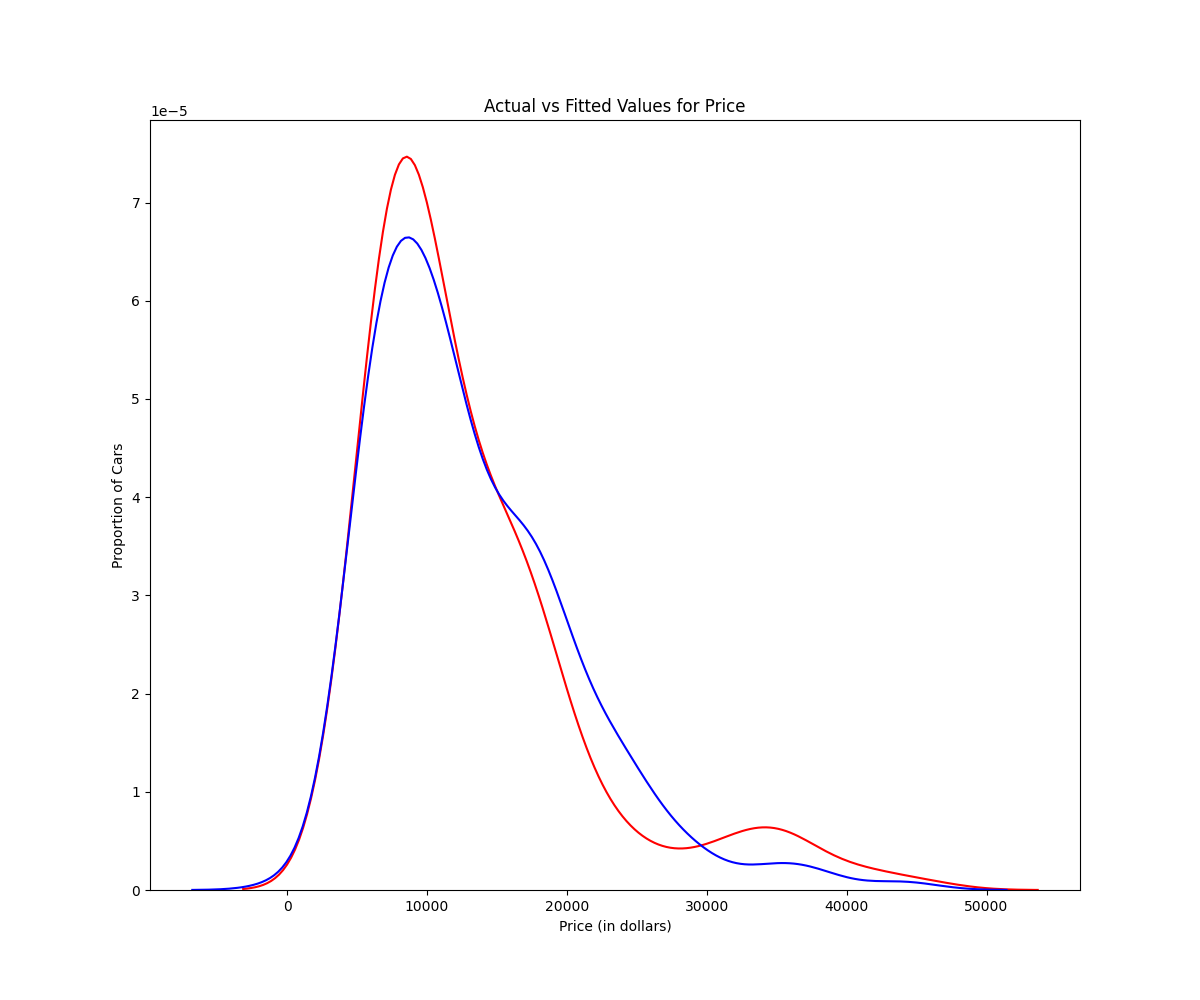

In [39]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [40]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [41]:
x = df['highway-mpg']
y = df['price']

In [42]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


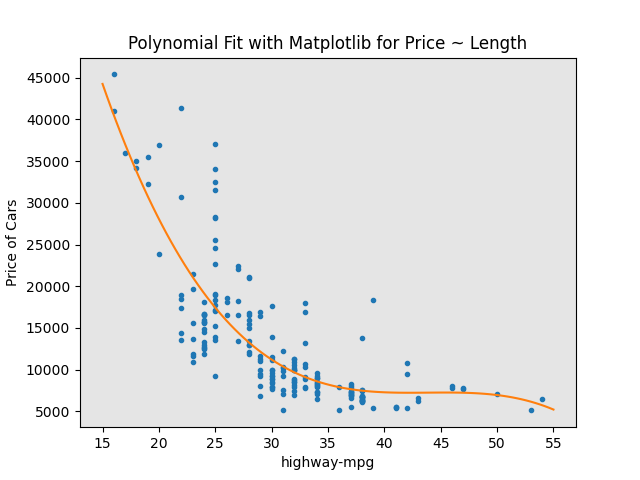

In [43]:
PlotPolly(p, x, y, 'highway-mpg')

In [44]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


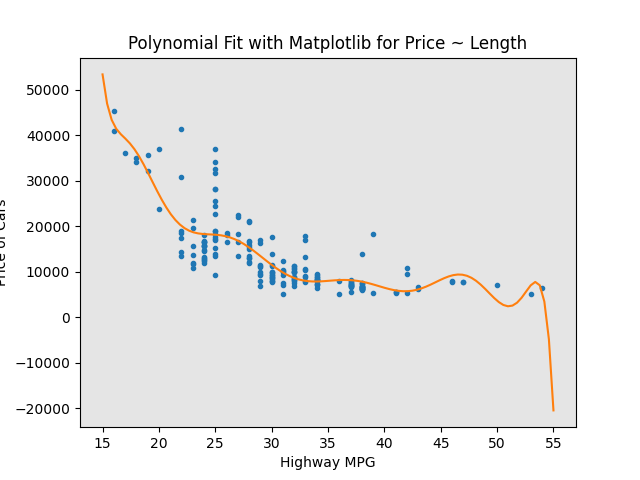

In [45]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

            20             19             18             17
-4.894e-21 x  + 1.919e-18 x  - 3.061e-16 x  + 2.334e-14 x 
              16             15             14             13
 - 5.367e-13 x  - 4.158e-11 x  + 2.556e-09 x  + 6.261e-08 x 
              12             11           10          9         8
 - 8.514e-06 x  - 9.168e-07 x  + 0.02469 x  - 0.7864 x - 38.22 x
         7             6             5             4             3
 + 4237 x - 1.847e+05 x + 4.964e+06 x - 8.966e+07 x + 1.099e+09 x
              2
 - 8.824e+09 x + 4.201e+10 x - 9.01e+10


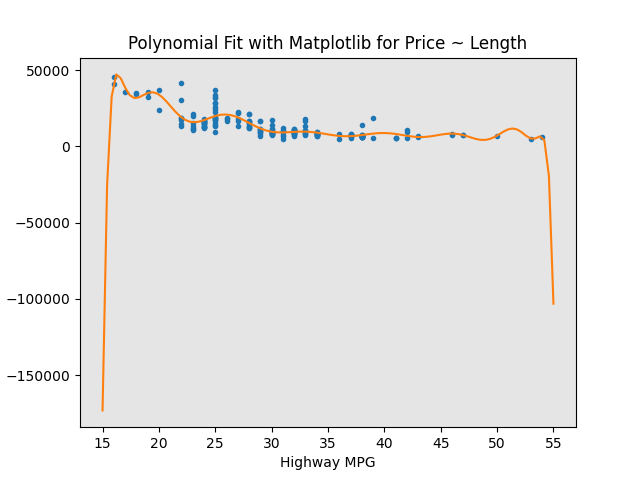

In [47]:
f1 = np.polyfit(x, y, 20)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [52]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]


In [53]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [54]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [55]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [56]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [57]:
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [58]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888
